#3.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas import DataFrame

In [3]:
df = pd.read_csv(r'C:\Users\david\Desktop\мага\Анализ данных на python\семестр 2\Lab_03-04\Lab_03-04\Задачи_для_лабораторной_ARIMA_1\M3_152_0.csv', header=None, index_col=0)
df.head()

,1
0,
0,5717.0
1,6374.0
2,5837.5
3,7318.4
4,4613.0


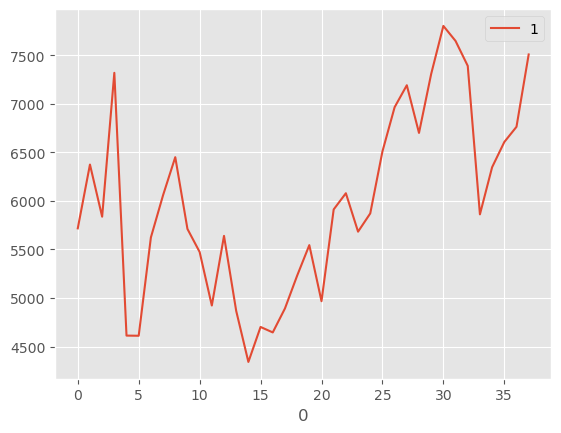

In [4]:
df.plot()
plt.show()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1,38.0,5991.560526,967.895124,4342.0,5290.875,5866.2,6676.3,7801.3


In [ ]:
#определяю паарметры p - порядок авторегрессии и q - порядок скользящего среднего

#по acf подбираем пордок q  по pacf  - порядок авторегрсисии

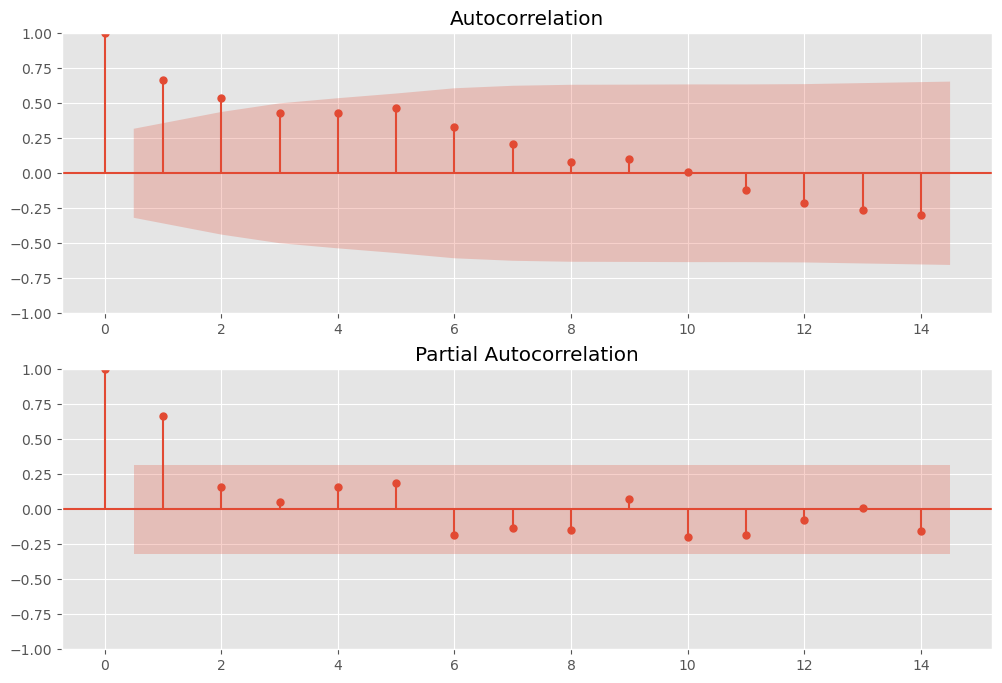

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(df, lags=14, ax=plt.gca())
plt.subplot(212)
plot_pacf(df, method='ywmle', lags=14, ax=plt.gca())
plt.show()

Автокорреляция:Лаг 1  очень значим дальшше начинает постепенно затухать стремитьься в зону шума - автокорреляция первого порядка 

Частная: 1 лаг очень значим.

Плавное заутхование графика автокорреляции  и резкий первый столбик pacf - предполагаю классическая ar(1)


итого

p - по pacf ровный обрыв после первого лага

q - на также наблюдается обрыв после первого лага

In [42]:
from statsmodels.tsa.stattools import adfuller

#подбор параметра разности

In [46]:
def find_minimum_differencing(series, max_d=3, alpha=0.05):
    """
    Подбираю минимальный порядок разностей d, при котором ряд становится стационарным
    - series pandas.Series с временным рядом
    - max_d максимальный порядок разностей для проверки
    - alpha уровень значимости (обычно 0.05) для ADF-теста
    
    ADF  тест - способ проверить есть ли в ряду единичный ворень 
    нулевая гипотеза:ряд нестационарен (содержит единичный корень), т.е. ведёт себя как случайное блуждание
    альтернативная: ряд стационарен — колеблется вокруг постоянного уровня или тренда, его статистики
    
    строится регресисонная модель иподбирается коэф для  фактора разности 
    если коэф = 0 то ряд нестационарен иначе стационарен (возвращается к среднему)
    """
    adf_results = []
    for d in range(max_d + 1):
        # Берём d-разность
        if d == 0:
            diff_ser = series.copy()
        else:
            diff_ser = series.diff(d).dropna()
        
        # Применяем ADF-тест
        adf_stat, pvalue, _, _, crit_vals, _ = adfuller(diff_ser)
        adf_results.append((d, pvalue))
        print(f"d={d:>1}  ADF p-value={pvalue:.4f}")
        
        # Если p-value < alpha то  ряд стационарен
        if pvalue < alpha:
            print(f"--> Ряд стал стационарным при d={d}")
            return d, adf_results
    
    print(f"Ряд не стал стационарным до d={max_d}")
    return None, adf_results

d_optimal, results = find_minimum_differencing(df, max_d=3)
print("Оптимальный d:", d_optimal)


d=0  ADF p-value=0.1928
d=1  ADF p-value=0.0000
--> Ряд стал стационарным при d=1
Оптимальный d: 1


d - сделаю первую разность чтобы убрать тренд


In [47]:
model = ARIMA(df, order=(1,1,1))
model_fit = model.fit()
model_fit

In [48]:
df_predict = model_fit.predict(0, 45)
df_fit = model_fit.forecast(steps=10, alpha=0.05)


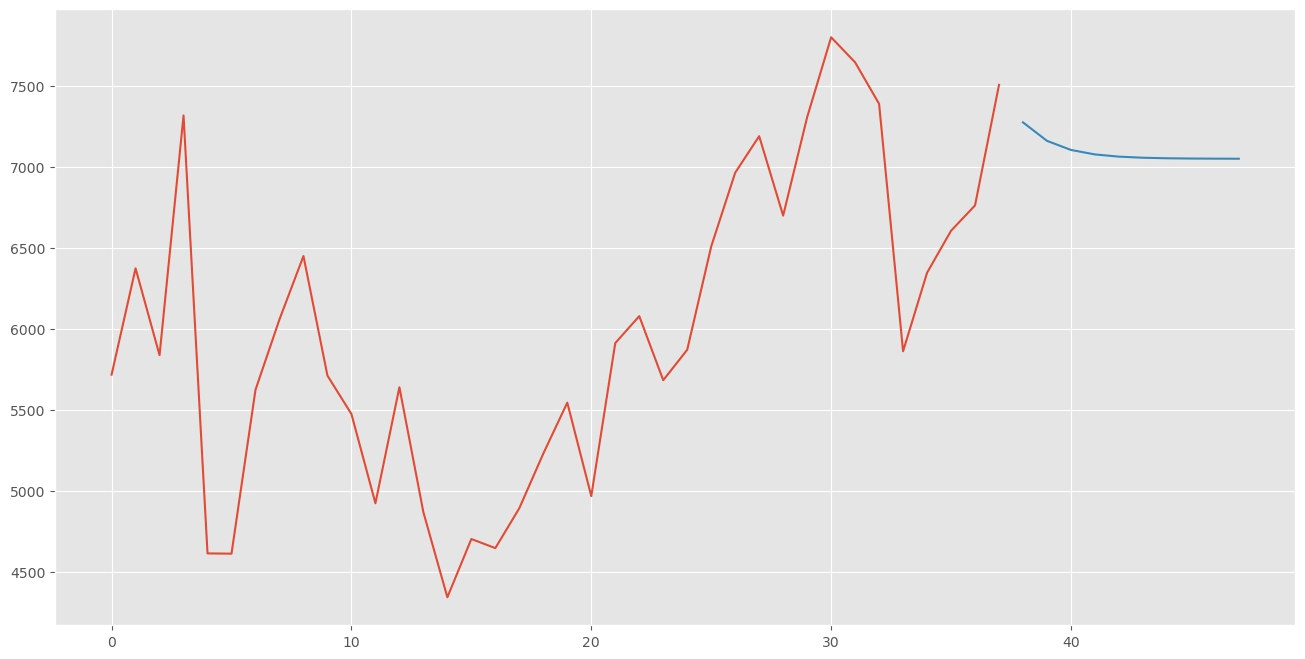

In [49]:
plt.figure(figsize=(16,8))
plt.plot(df, label='main datas')
plt.plot(df_fit, label='predict')
plt.show()

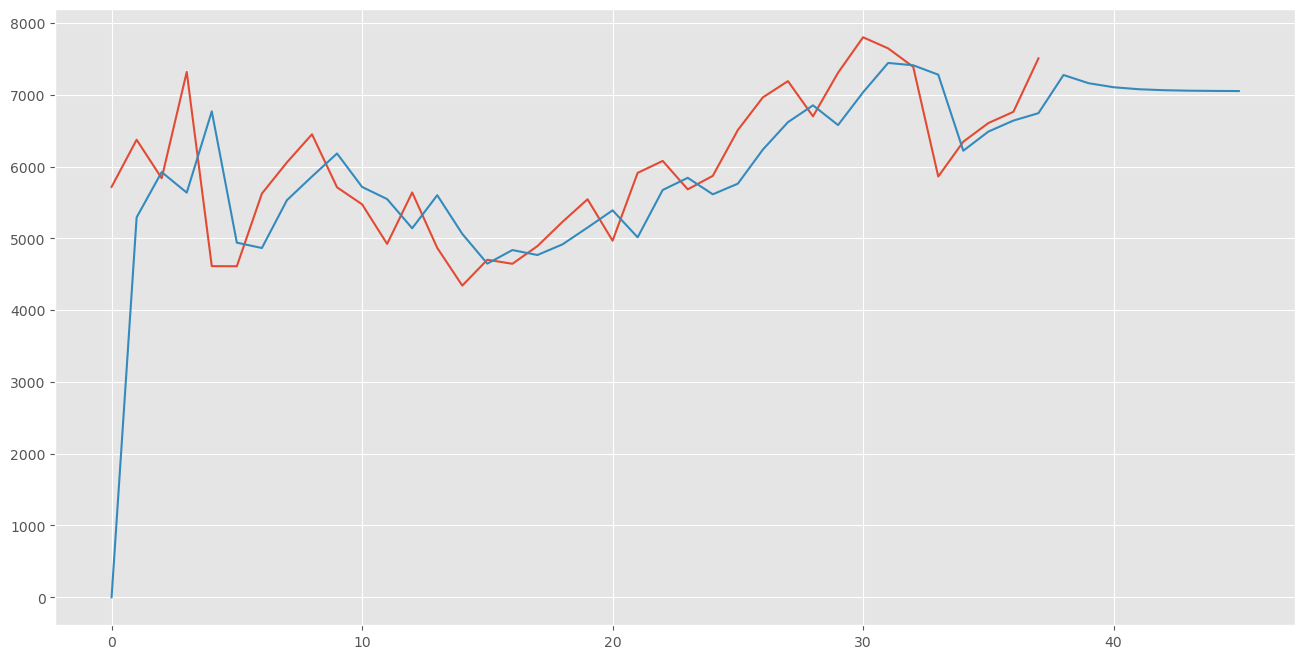

In [50]:
plt.figure(figsize=(16,8))
plt.plot(df, label='main datas')
plt.plot(df_predict, label='predict')
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
mae = mean_absolute_error(df.iloc[1:], df_predict.iloc[1:len(df)])
rmse = mean_squared_error(df.iloc[1:], df_predict.iloc[1:len(df)], squared=False)

C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
mae

545.5488248276811

In [61]:
rmse

711.3491983111273

#3.2

In [64]:
new_df = pd.read_excel(r'C:\Users\david\Desktop\мага\Анализ данных на python\семестр 2\Lab_03-04\Lab_03-04\Задачи_для_лабораторной_ARIMA_2\M3C.xls', index_col=0)
new_df

,N,NF,Category,Starting Year,Unnamed: 5,1,2,3,4,5,...,38,39,40,41,42,43,44,45,46,47
Series,,,,,,,,,,,,,,,,,,,,,
N 1,20,6,MICRO,1975,1,940.66,1084.86,1244.98,1445.02,1683.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N 2,20,6,MICRO,1975,1,1991.05,2306.40,2604.00,2992.30,3722.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N 3,20,6,MICRO,1975,1,1461.57,1692.50,2193.82,2459.68,3246.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N 4,20,6,MICRO,1975,1,744.54,1105.16,1417.40,1838.04,2337.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N 5,20,6,MICRO,1975,1,4977.18,5248.00,5370.00,6184.89,7137.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N 641,36,6,OTHER,1811,1,5980.00,4970.00,5020.00,3820.00,4510.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N 642,36,6,OTHER,1847,1,4950.00,6610.00,6860.00,6460.00,5390.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N 643,36,6,OTHER,1883,1,5700.00,4420.00,5900.00,6810.00,4960.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
new_df.reset_index(inplace=True)

In [69]:
new_df_3 = new_df[new_df['Series'].isin(["N 152", "N 246", "N 397"])]

In [70]:
new_df_3 = new_df_3.T

In [71]:
new_df_3

,151,245,396
Series,N 152,N 246,N 397
N,44,46,40
NF,6,6,6
Category,INDUSTRY,INDUSTRY,DEMOGRAPHIC
Starting Year,1947,1947,1954
Unnamed: 5,1,1,1
1,5717.0,671.5,5000.0
2,6374.0,810.0,3900.0
3,5837.5,997.0,3600.0
4,7318.4,1117.5,3800.0


In [72]:
new_df_3_46 = new_df_3.iloc[6:52]
new_df_3_46

,151,245,396
1,5717.0,671.5,5000.0
2,6374.0,810.0,3900.0
3,5837.5,997.0,3600.0
4,7318.4,1117.5,3800.0
5,4613.0,1300.0,6100.0
6,4611.4,1404.0,4800.0
7,5623.6,1643.5,5000.0
8,6058.7,1339.5,6000.0
9,6449.9,1797.0,4900.0
10,5711.2,2357.0,5000.0


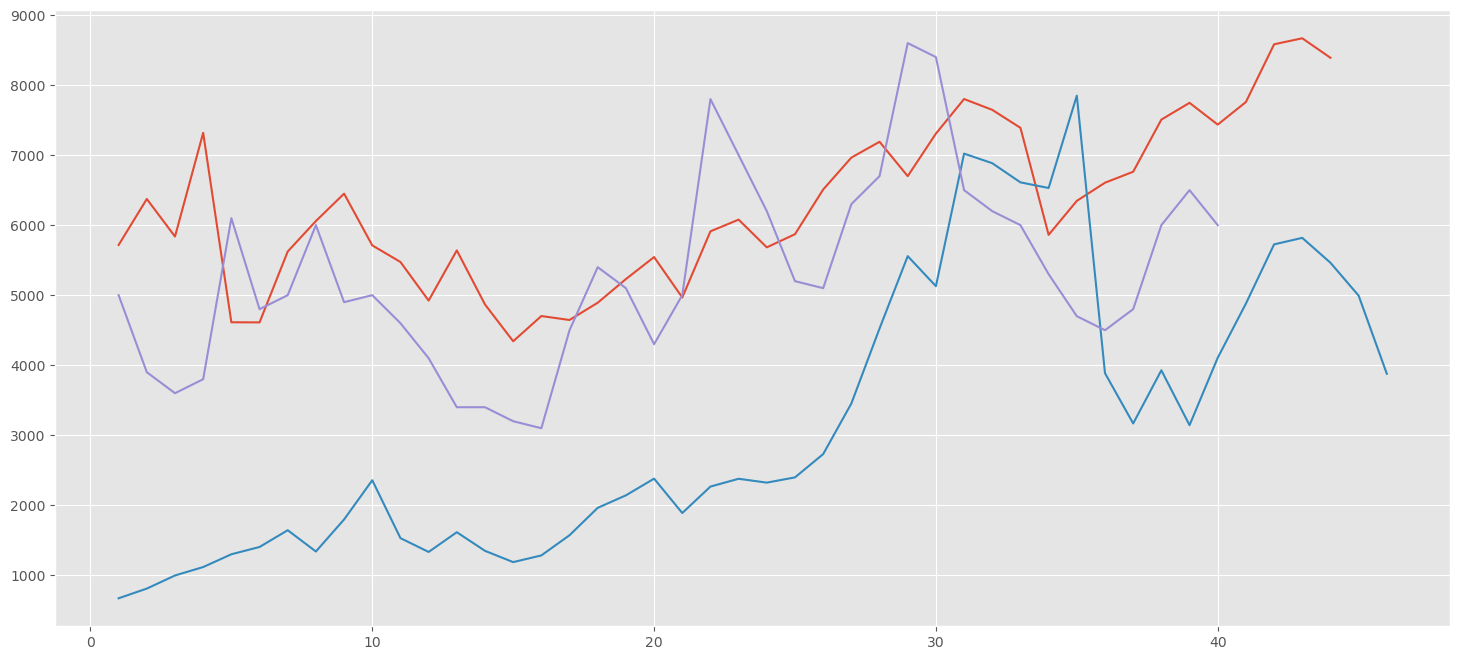

In [73]:
plt.figure(figsize=(18,8)) # Размер графика
plt.plot(new_df_3_46)
plt.show()

#Выводим данные для первого столбца

In [74]:
new_df_3_46_1 = new_df_3_46.iloc[:44, 0]
new_df_3_46_1

1     5717.0
2     6374.0
3     5837.5
4     7318.4
5     4613.0
6     4611.4
7     5623.6
8     6058.7
9     6449.9
10    5711.2
11    5474.1
12    4922.7
13    5639.5
14    4867.4
15    4342.0
16    4701.9
17    4645.7
18    4892.3
19    5229.8
20    5544.4
21    4967.0
22    5912.0
23    6078.8
24    5683.0
25    5870.9
26    6508.9
27    6964.5
28    7190.5
29    6699.7
30    7307.3
31    7801.3
32    7646.5
33    7390.0
34    5861.5
35    6346.7
36    6606.1
37    6762.7
38    7507.4
39    7746.8
40    7435.6
41    7758.2
42    8582.8
43    8668.7
44    8390.3
Name: 151, dtype: object

In [134]:
#d_optimal, results = find_minimum_differencing(new_df_3_46_1, max_d=3)
#print("Оптимальный d:", d_optimal)

In [ ]:
#нет четкого затухания, коэфы постепенно затухают
#вывод нет четкого МА компонента поэтому q = 0

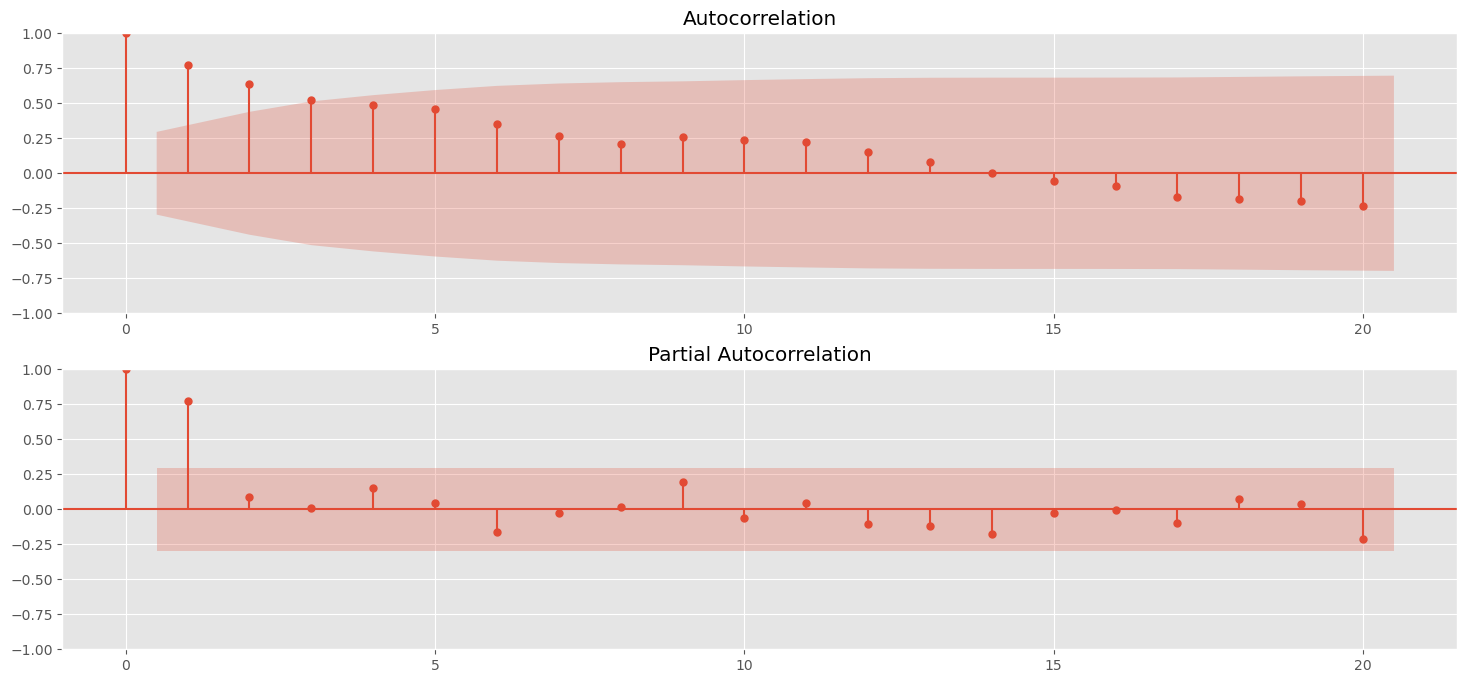

In [135]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(new_df_3_46_1, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(new_df_3_46_1, method='ywmle', lags=20, ax=plt.gca())
plt.show()


In [ ]:
#лаг 1 сильно значим
#з = 1
#итого(1 1 0)

In [76]:
# new_df_3_46_1.index = pd.DatetimeIndex(new_df_3_46_1.index)
# y = new_df_3_46_1.asfreq('D')
# y

In [136]:
new_df_3_46_1 = new_df_3_46_1.astype(float)

In [137]:
new_df_3_46_1.head()

1    5717.0
2    6374.0
3    5837.5
4    7318.4
5    4613.0
Name: 151, dtype: float64

In [143]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Пример: создаём временной индекс (даты)
date_range = pd.date_range(start='1970-01-01', periods=len(new_df_3_46_1), freq='D')

# Превращаем Series в DataFrame с временным индексом
ts = pd.Series(new_df_3_46_1.values, index=date_range)

# Убедимся что теперь индекс правильный
print(type(ts.index))  # pandas.core.indexes.datetimes.DatetimeIndex

# Обучаем модель ARIMA
model = ARIMA(ts, order=(1,0,0)) #pdq (компоент скользящей)
model_fit = model.fit()
print(model_fit.summary())

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   44
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -349.936
Date:                Sun, 25 May 2025   AIC                            705.872
Time:                        10:34:56   BIC                            711.224
Sample:                    01-01-1970   HQIC                           707.856
                         - 02-13-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6281.7645    649.299      9.675      0.000    5009.163    7554.366
ar.L1          0.8231      0.121      6.795      0.000       0.586       1.06

Средний уровень ряда 6281.7645

Коэффициент автокорреляции на лаге 1. Значимо (p < 0.000) то есть есть сильная зависимость от прошлого значения

Вмн параметры значимы так как p-value  меньше 0.05 - можно считать модель адекватной

AR 1 компонента сильная и равня 0.82 - это высокий уровень автозависимости

In [144]:
df_predict.index = range(1, len(df_predict) + 1)
df_predict.index

RangeIndex(start=1, stop=53, step=1)

In [145]:
df_predict = model_fit.predict(1, 52)
df_predict

1970-01-02    5816.921911
1970-01-03    6357.681076
1970-01-04    5916.102245
1970-01-05    7134.991510
1970-01-06    4908.248977
1970-01-07    4906.932059
1970-01-08    5740.046864
1970-01-09    6098.166061
1970-01-10    6420.152340
1970-01-11    5812.148086
1970-01-12    5616.997404
1970-01-13    5163.154781
1970-01-14    5753.133730
1970-01-15    5117.638827
1970-01-16    4685.196109
1970-01-17    4981.420194
1970-01-18    4935.163474
1970-01-19    5138.133352
1970-01-20    5415.920594
1970-01-21    5674.859458
1970-01-22    5199.616928
1970-01-23    5977.421207
1970-01-24    6114.709835
1970-01-25    5788.937419
1970-01-26    5943.592894
1970-01-27    6468.713666
1970-01-28    6843.705866
1970-01-29    7029.720434
1970-01-30    6625.756053
1970-01-31    7125.855397
1970-02-01    7532.453612
1970-02-02    7405.041863
1970-02-03    7193.923559
1970-02-04    5935.856004
1970-02-05    6335.211175
1970-02-06    6548.716391
1970-02-07    6677.609672
1970-02-08    7290.552366
1970-02-09  

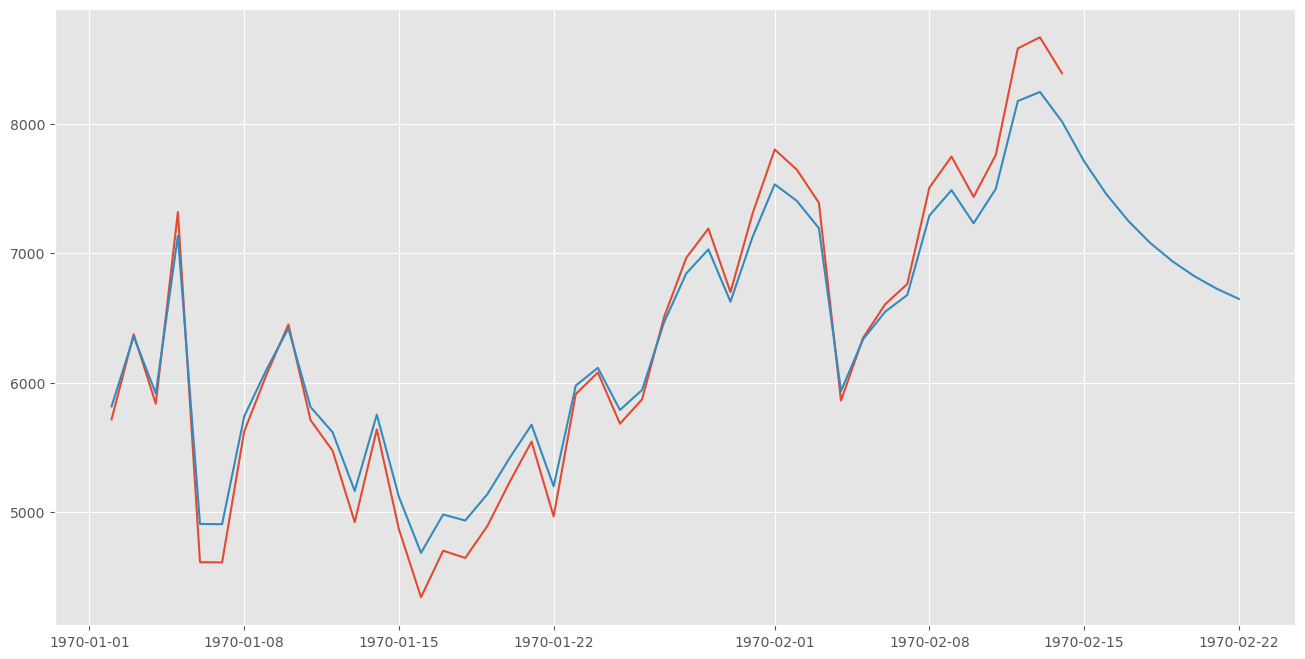

In [146]:
plt.figure(figsize=(16,8))
plt.plot(new_df_3_46_1, label='main datas')
plt.plot(df_predict, label='predict')
plt.show()

#Выводим данные для второго столбца

In [147]:
new_df_3_46_2 = new_df_3_46.iloc[:46, 1]
new_df_3_46_2

1      671.5
2      810.0
3      997.0
4     1117.5
5     1300.0
6     1404.0
7     1643.5
8     1339.5
9     1797.0
10    2357.0
11    1530.5
12    1333.0
13    1615.0
14    1349.0
15    1188.0
16    1283.5
17    1572.0
18    1963.0
19    2141.5
20    2380.0
21    1889.0
22    2267.0
23    2378.0
24    2323.0
25    2398.0
26    2730.5
27    3453.0
28    4524.0
29    5557.5
30    5128.5
31    7021.5
32    6884.5
33    6611.0
34    6530.5
35    7849.5
36    3886.5
37    3168.0
38    3927.0
39    3143.5
40    4106.0
41    4879.5
42    5725.5
43    5818.5
44    5463.0
45    4993.5
46    3878.0
Name: 245, dtype: object

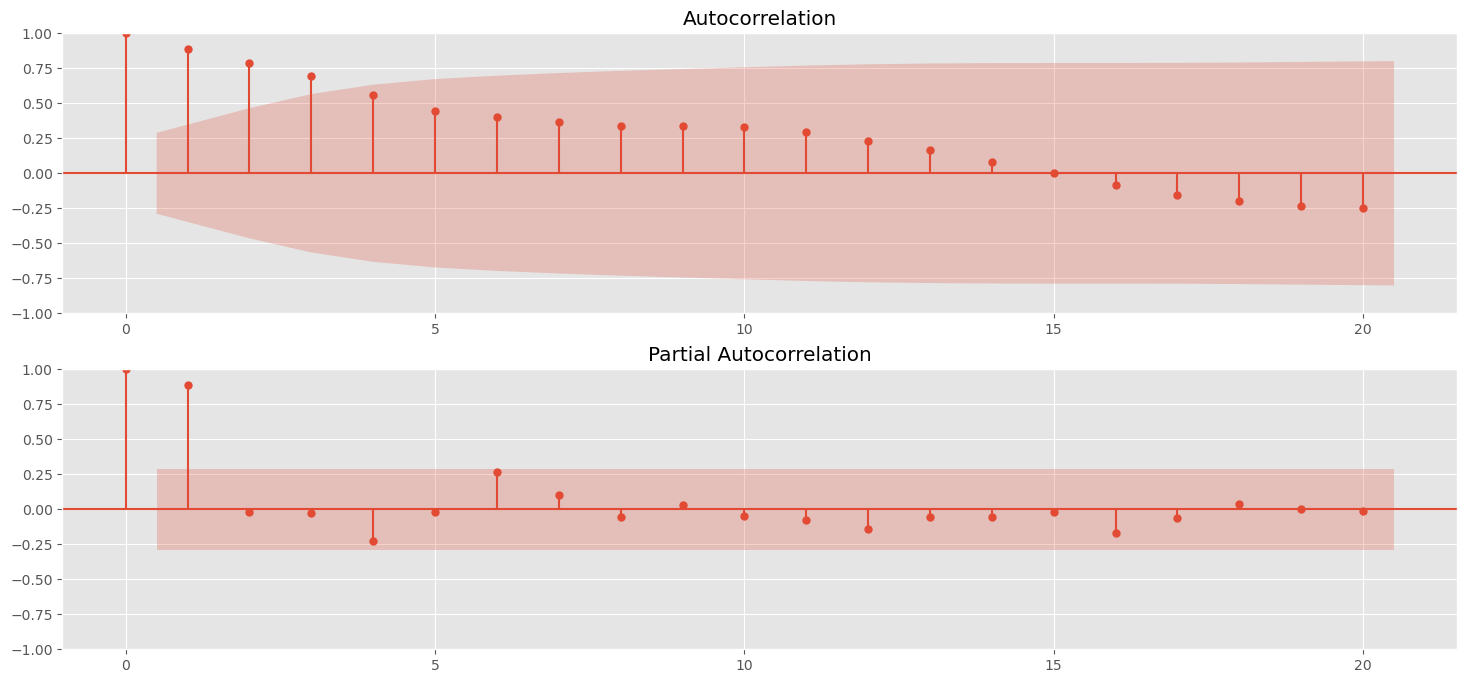

In [148]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(new_df_3_46_2, lags=20, ax=plt.gca())
plt.subplot(212)

plot_pacf(new_df_3_46_2, method='ywmle', lags=20, ax=plt.gca())
plt.show()

In [149]:
new_df_3_46_2.dtypes

dtype('O')

In [150]:
new_df_3_46_2 = new_df_3_46_2.astype(float)

In [151]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Пример: создаём временной индекс (даты)
date_range = pd.date_range(start='1970-01-01', periods=len(new_df_3_46_2), freq='D')

# Превращаем Series в DataFrame с временным индексом
ts = pd.Series(new_df_3_46_2.values, index=date_range)

# Убедимся что теперь индекс правильный
print(type(ts.index))  # pandas.core.indexes.datetimes.DatetimeIndex

# Обучаем модель ARIMA
model = ARIMA(ts, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   46
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -375.004
Date:                Sun, 25 May 2025   AIC                            756.008
Time:                        10:35:09   BIC                            761.494
Sample:                    01-01-1970   HQIC                           758.063
                         - 02-15-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3181.0212   1143.037      2.783      0.005     940.710    5421.333
ar.L1          0.9061      0.056     16.222      0.000       0.797       1.01

In [152]:
df_predict = model_fit.predict(1, 54)
df_predict

1970-01-02     907.184315
1970-01-03    1032.676943
1970-01-04    1202.114642
1970-01-05    1311.297758
1970-01-06    1476.658079
1970-01-07    1570.890811
1970-01-08    1787.897917
1970-01-09    1512.448396
1970-01-10    1926.981804
1970-01-11    2434.388817
1970-01-12    1685.510430
1970-01-13    1506.558850
1970-01-14    1762.074524
1970-01-15    1521.056193
1970-01-16    1375.176677
1970-01-17    1461.707694
1970-01-18    1723.112915
1970-01-19    2077.391740
1970-01-20    2239.127725
1970-01-21    2455.228748
1970-01-22    2010.341527
1970-01-23    2352.841261
1970-01-24    2453.416580
1970-01-25    2403.581963
1970-01-26    2471.538259
1970-01-27    2772.811173
1970-01-28    3427.456829
1970-01-29    4397.872742
1970-01-30    5334.310507
1970-01-31    4945.600491
1970-02-01    6660.817413
1970-02-02    6536.683911
1970-02-03    6288.869950
1970-02-04    6215.930192
1970-02-05    7411.054925
1970-02-06    3820.244222
1970-02-07    3169.222902
1970-02-08    3856.940622
1970-02-09  

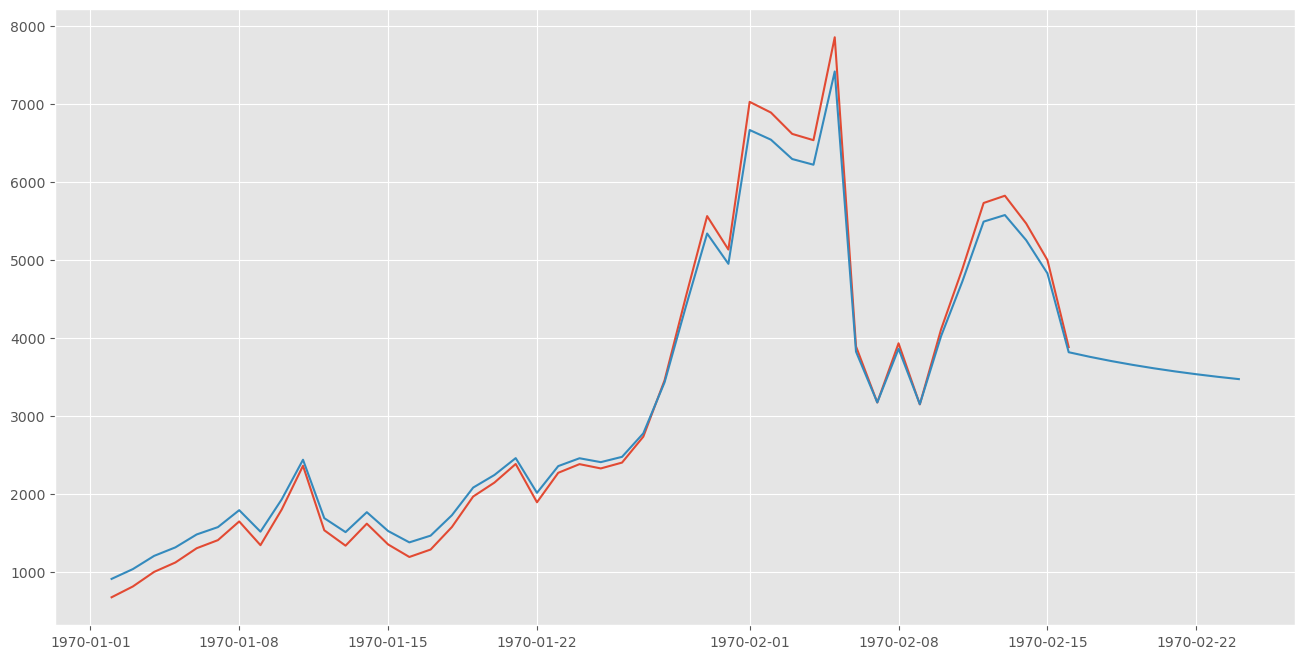

In [153]:
plt.figure(figsize=(16,8))
plt.plot(new_df_3_46_2, label='main datas')
plt.plot(df_predict, label='predict')
plt.show()

#Выводим данные для третьего столбца

In [94]:
new_df_3_46_3 = new_df_3_46.iloc[:40, 2]
new_df_3_46_3

1     5000.0
2     3900.0
3     3600.0
4     3800.0
5     6100.0
6     4800.0
7     5000.0
8     6000.0
9     4900.0
10    5000.0
11    4600.0
12    4100.0
13    3400.0
14    3400.0
15    3200.0
16    3100.0
17    4500.0
18    5400.0
19    5100.0
20    4300.0
21    5000.0
22    7800.0
23    7000.0
24    6200.0
25    5200.0
26    5100.0
27    6300.0
28    6700.0
29    8600.0
30    8400.0
31    6500.0
32    6200.0
33    6000.0
34    5300.0
35    4700.0
36    4500.0
37    4800.0
38    6000.0
39    6500.0
40    6000.0
Name: 396, dtype: object

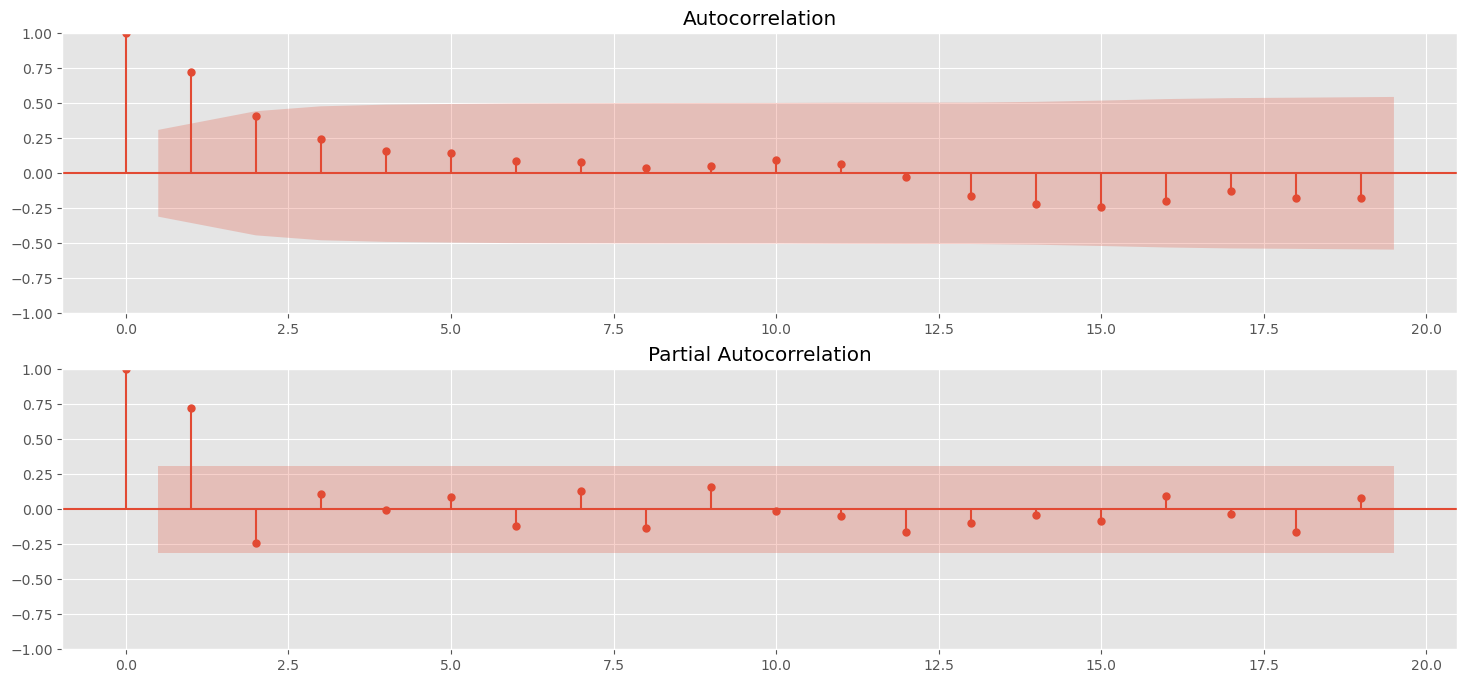

In [97]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(new_df_3_46_3, lags=19, ax=plt.gca())
plt.subplot(212)

plot_pacf(new_df_3_46_3, method='ywmle', lags=19, ax=plt.gca())
plt.show()

In [98]:
new_df_3_46_3.dtypes

dtype('O')

In [99]:
# model = ARIMA(new_df_3_46_3, order=(1,0,0))
# model_fit = model.fit()
# model_fit

In [100]:
new_df_3_46_3 = new_df_3_46_3.astype(np.int32)

In [101]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Пример: создаём временной индекс (даты)
date_range = pd.date_range(start='1970-01-01', periods=len(new_df_3_46_3), freq='D')

# Превращаем Series в DataFrame с временным индексом
ts = pd.Series(new_df_3_46_3.values, index=date_range)

# Убедимся что теперь индекс правильный
print(type(ts.index))  # pandas.core.indexes.datetimes.DatetimeIndex

# Обучаем модель ARIMA
model = ARIMA(ts, order=(1,0,0))
model_fit = model.fit()
print(model_fit.summary())

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -329.324
Date:                Sun, 25 May 2025   AIC                            664.648
Time:                        10:06:27   BIC                            669.715
Sample:                    01-01-1970   HQIC                           666.480
                         - 02-09-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5300.0000    683.203      7.758      0.000    3960.946    6639.054
ar.L1          0.7120      0.117      6.105      0.000       0.483       0.94

In [102]:
df_predict = model_fit.predict(1, 54)
df_predict

1970-01-02    5086.401406
1970-01-03    4303.206533
1970-01-04    4089.607931
1970-01-05    4232.006999
1970-01-06    5869.596280
1970-01-07    4944.002339
1970-01-08    5086.401406
1970-01-09    5798.396746
1970-01-10    5015.201873
1970-01-11    5086.401406
1970-01-12    4801.603271
1970-01-13    4445.605601
1970-01-14    3947.208864
1970-01-15    3947.208864
1970-01-16    3804.809796
1970-01-17    3733.610262
1970-01-18    4730.403737
1970-01-19    5371.199542
1970-01-20    5157.600940
1970-01-21    4588.004669
1970-01-22    5086.401406
1970-01-23    7079.988356
1970-01-24    6510.392085
1970-01-25    5940.795814
1970-01-26    5228.800474
1970-01-27    5157.600940
1970-01-28    6011.995348
1970-01-29    6296.793483
1970-01-30    7649.584628
1970-01-31    7507.185560
1970-02-01    6154.394415
1970-02-02    5940.795814
1970-02-03    5798.396746
1970-02-04    5300.000008
1970-02-05    4872.802805
1970-02-06    4730.403737
1970-02-07    4944.002339
1970-02-08    5798.396746
1970-02-09  

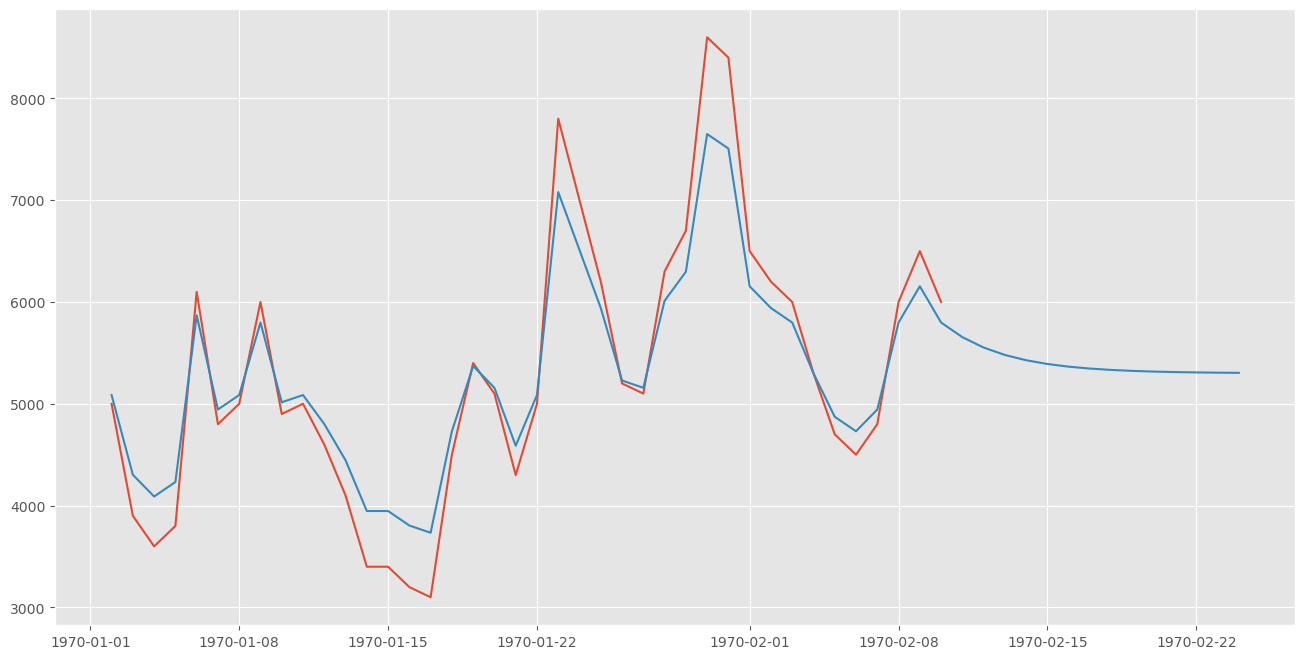

In [103]:
plt.figure(figsize=(16,8))
plt.plot(new_df_3_46_3, label='main datas')
plt.plot(df_predict, label='predict')
plt.show()